In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
import pdb
import json
from math import sqrt

In [31]:
file_csv = '/mnt/disk15tb/paula/Main_DA_Projects/data_analysis_output/Organoids/Pharmacology_RETT_T4/Network_outputs/Compiled_Networks.csv'

data_df = pd.read_csv(file_csv)

In [32]:
df = data_df.replace(np.NaN,0.0)
data_df

,Run_ID,DIV,Well,NeuronType,Time,Chip_ID,IBI,Burst_Peak,Number_Bursts,Spike_per_Burst,BurstDuration,Mean_FiringRate,Mean_SpikeAmplitude,Active_area
0,2,100,1,RETT,25-Jan-2024 13:03:04,16461,3.971233,1.232613,74,556.216216,0.509459,0.500240,24.140356,4.72
1,5,100,1,RETT,25-Jan-2024 13:44:53,21644,14.380000,3.113043,21,1911.523810,0.590476,0.614837,25.288028,6.82
2,7,100,1,RETT,25-Jan-2024 14:25:46,21613,2.573043,1.217686,116,226.706897,0.362931,0.538383,24.770376,2.95
3,9,100,1,RETT,25-Jan-2024 15:02:09,21670,14.180000,2.839148,21,1900.714286,0.752381,0.576684,25.490286,5.10
4,11,100,1,RETT,25-Jan-2024 15:46:10,16855,4.329851,1.528009,68,1103.161765,0.702941,0.786209,23.833509,9.77
5,13,100,1,RETT,25-Jan-2024 16:20:09,16364,3.051042,1.550689,97,1308.731959,0.989691,0.993971,24.533935,8.45
6,15,100,1,RETT,25-Jan-2024 16:54:02,16744,13.077273,3.637790,23,2560.173913,0.760870,0.607130,23.797659,7.38
7,20,101,1,RETT,26-Jan-2024 11:31:32,21649,15.411111,4.795907,19,1417.052632,0.731579,0.544492,25.580743,2.63
8,22,101,1,RETT,26-Jan-2024 12:19:40,18828,4.941667,0.987284,61,331.622951,0.339344,0.819672,25.702722,6.97
9,24,101,1,RETT,26-Jan-2024 14:09:14,18658,6.836585,1.997568,42,971.571429,0.547619,0.576807,23.982798,4.29


In [33]:
df['DIV'].unique()

array([100, 101, 107, 108, 114, 120, 127])

In [34]:
df['NeuronType'] = df['NeuronType'].str.lower()
df['NeuronType'].unique()


array(['rett', 'baseline before treatment', 'baseline control',
       'treatment nbx + ap5', 'washes treatment', 'washes control'],
      dtype=object)

In [35]:
df.columns

Index(['Run_ID', 'DIV', 'Well', 'NeuronType', 'Time', 'Chip_ID', 'IBI',
       'Burst_Peak', 'Number_Bursts', 'Spike_per_Burst', 'BurstDuration',
       'Mean_FiringRate', 'Mean_SpikeAmplitude', 'Active_area'],
      dtype='object')

Number of unique Genotypes: 5
['baseline before treatment', 'treatment nbx + ap5', 'washes treatment', 'baseline control', 'washes control']
Number of unique Genotypes: 5
['baseline before treatment', 'treatment nbx + ap5', 'washes treatment', 'baseline control', 'washes control']
Number of unique Genotypes: 5
['baseline before treatment', 'treatment nbx + ap5', 'washes treatment', 'baseline control', 'washes control']
Number of unique Genotypes: 5
['baseline before treatment', 'treatment nbx + ap5', 'washes treatment', 'baseline control', 'washes control']
Number of unique Genotypes: 5
['baseline before treatment', 'treatment nbx + ap5', 'washes treatment', 'baseline control', 'washes control']


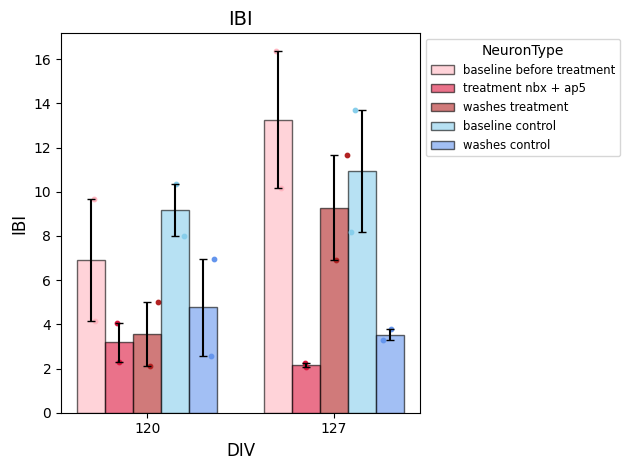

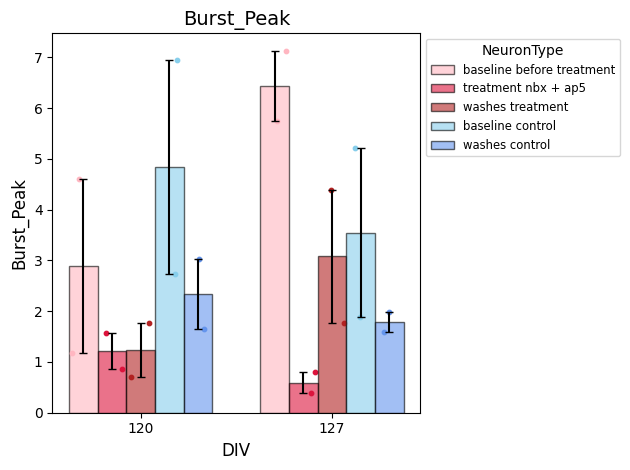

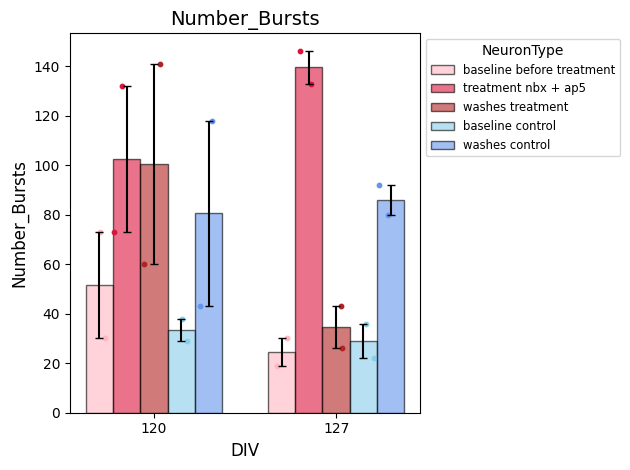

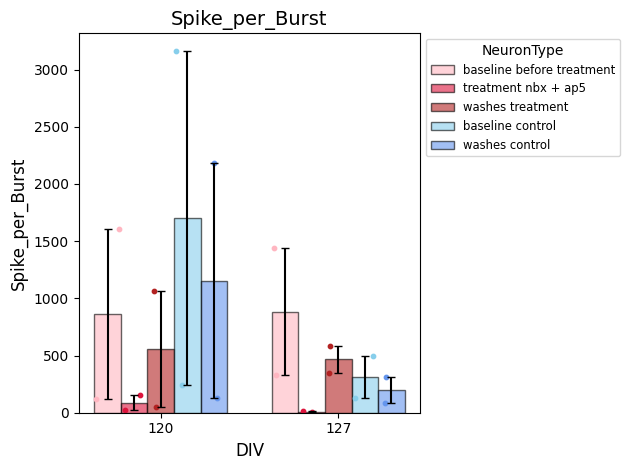

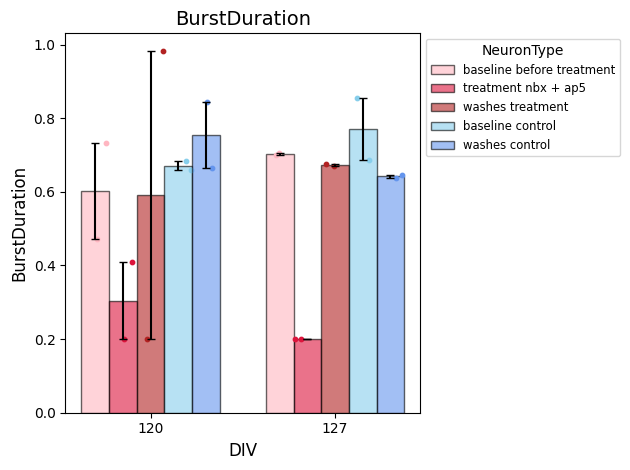

In [39]:
output_types =['IBI',
       'Burst_Peak', 'Number_Bursts', 'Spike_per_Burst', 'BurstDuration']
dirpath = f'/home/mmp/Documents/Organoids_RETT_Pharma/'
unique_genotypes =[ 'baseline before treatment',
       'treatment nbx + ap5', 'washes treatment', 'baseline control','washes control']
div = [120,127]

for output_type in output_types:
    total_genotypes = len(unique_genotypes)
    #output_type='Number_Bursts'
    # Print the number of unique genotypes
    print(f"Number of unique Genotypes: {total_genotypes}")

    # Initialize output arrays for each unique genotype
    output_arrays = {genotype: [] for genotype in unique_genotypes}
    chip_arrays = {genotype: [] for genotype in unique_genotypes}
    well_arrays = {genotype: [] for genotype in unique_genotypes}
    print(unique_genotypes)
    # Fill data from data frame
    for i in div:
        for genotype in unique_genotypes:
            temp_df = df.loc[(df['DIV'] == i) &
                            (df['NeuronType'].str.strip() == genotype)
                            ]
            output_arrays[genotype].append(np.array(temp_df[output_type]))
            chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
            well_arrays[genotype].append(np.array(temp_df['Well']))
    #print(df)
    # Adjust bar width and gap between them
    bar_width = 0.15  # Adjust as necessary for your specific plot
    gap_between_bars = 0.0  # Adjust the gap between bars within a group

    # Calculate the total width for all bars in a group
    total_bar_group_width = total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars

    # Create x-coordinates of bars for each genotype group
    x_genotype = {genotype: [] for genotype in unique_genotypes}
    base_x_coordinate = np.arange(len(div))  # Base x-coordinates for each group
    offset = (total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars) / 2
    centered_x = base_x_coordinate - offset + bar_width / 2
    for i, genotype in enumerate(unique_genotypes):
        x_genotype[genotype] = centered_x + i * (bar_width + gap_between_bars)



    # Initialize plot
    fig, ax = plt.subplots()
    # Generate a list of distinct colors based on the number of genotypes
    #colorscolors  = [plt.colormaps['Set1'](i) for i in np.linspace(0, 1, len(unique_genotypes))]# Using a colormap to generate colors
    colors = ['#FFB6C1', '#DC143C', '#B22222', '#87CEEB', '#6495ED']
    #colors2 = [plt.colormaps['Set2'](i) for i in np.linspace(0, 1, len(unique_genotypes))]#
    #marker_shapes = ['^', 's', 'v', 'D', '+', 'x', '*', 'H', '8']
    #marker_chips={chip:marker_shapes[idx] for idx, chip in enumerate(track_chips)}
    # Plot data for each genotype
    mean_data_all ={}
    yerr_data_all = {}
    n_data_all={}
    #breakpoint()
    #pdb.set_trace()
    for i,genotype in enumerate(unique_genotypes):
        #breakpoint()
        y_data = output_arrays[genotype]
        chipy_data = chip_arrays[genotype]
        welly_data = well_arrays[genotype]
        #print("type: ",type(genotype))
        # Calculate statistics
        mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
        yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_data]
        n_data = [len(yi) for yi in y_data]
        # Store statistics in dictionaries
        mean_data_all[genotype] = mean_data
        yerr_data_all[genotype] = yerr_data
        n_data_all[genotype] = n_data
        # Save statistics to file
        output_file = f"intermediate_files/{output_type}_{genotype}_statistics.txt"
        with open(output_file, 'w') as file:
            file.write(f"{genotype} Statistics\n")
            file.write("Mean: " + ", ".join([str(m) for m in mean_data]) + "\n")
            file.write("SEM: " + ", ".join([str(sem) for sem in yerr_data]) + "\n")
            file.write("Sample Size (n): " + ", ".join([str(n_data)]) + "\n")
            
        # Plot bars
        #transparency value 
        alpha_value = 0.5
        ax.bar(x_genotype[genotype], mean_data, yerr=yerr_data, capsize=3, width=bar_width, color=colors[i], edgecolor='black', ecolor='black', label=genotype,alpha=0.6)

        #pdb.set_trace()
        # Plot scatter points
        #breakpoint()
        for j in range(len(x_genotype[genotype])):
            #pdb.set_trace()
            # ax.scatter(x_genotype[genotype][j] + np.zeros(y_data[j].size), y_data[j], s=20,color=colors2[i],marker=marker_chips[chipy_data[j]+str(welly_data[j])] if chipy_data[j]+str(welly_data[j]) in track_chips else 'o')
    # Concatenate corresponding elements from chipy_data[j] and welly_data[j]
            combined_data = [str(chip)+ str(well) for chip, well in zip(chipy_data[j], welly_data[j])]

            # # Check if the concatenated string is in track_chips, and set the marker accordingly
            # markers = [marker_chips.get(chipwell, 'o') for chipwell in combined_data]
            # #marker_chips[combined_data[0]] if combined_data[0] in track_chips else 'o'

            # Use the marker in the scatter plot
            jitter_amount=0.07
            for k in range(len(y_data[j])):
                #pdb.set_trace()
                ax.scatter(
                    x_genotype[genotype][j] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                    y_data[j][k],
                    s=10,
                    color=colors[i],
                    marker='o'
                        )


    # # Calculate maximum y-value for plotting significance
    # max_y = max([max(data) for data in output_arrays.values() if data.size > 0])
    # increment = max_y * 0.1  # Increment to adjust y-position for significance markers

    #Perform and plot t-tests between all pairs of genotype
    #pdb.set_trace()
    for i in range(len(centered_x)):
        #maxim = max([max( output_arrays[genotype][i] )for genotype in unique_genotypes])
        maxim = max(max(array) for genotype_arrays in output_arrays.values() for array in genotype_arrays)
        count = 1
        p_values = []
        for j, genotype1 in enumerate(unique_genotypes):
            for k, genotype2 in enumerate(unique_genotypes):
                if j < k:
                    #pdb.set_trace()
                    #print("mean_data_all",mean_data_all[genotype1])
                    #print("type:",type(genotype1))
                    mean1, sem1, n1 = mean_data_all[genotype1][i], yerr_data_all[genotype1][i], n_data_all[genotype1][i]
                    mean2, sem2, n2 = mean_data_all[genotype2][i], yerr_data_all[genotype2][i], n_data_all[genotype2][i]
                    #t_stat, p_value = stats.ttest_ind_from_stats(mean1, sem1, n1, mean2, sem2, n2)
                    sed = sqrt(sem1**2.0 + sem2**2.0)
                    t_stat = (mean1 - mean2) / sed
                    # degrees of freedom
                    degreef = n1+n2 - 2
                    alpha=0.05
                    # calculate the critical value
                    cv = stats.t.ppf(1.0 - alpha, degreef)
                    # calculate the p-vallue
                    p_value = (1.0 - stats.t.cdf(abs(t_stat), degreef)) * 2.0
                    p_values.append([genotype1,genotype2,mean1,sem1,mean2,sem2,p_value])

                    # Plot significance
                    #maxim = max(np.max(output_arrays[genotype1][i]), np.max(output_arrays[genotype2][i]))
                    x1, x2 = x_genotype[genotype1][i], x_genotype[genotype2][i]
                    
                    sign = "***" if p_value <= 0.001 else "**" if p_value <= 0.01 else "*" if p_value <= 0.05 else "ns"
                    # if not sign =='ns':
                    #     ax.plot([x1, x2], [maxim + 0.05*maxim*(count)] * 2, 'k', linewidth=1.5)
                    #     ax.text((x1 + x2) / 2, maxim +0.05*maxim*(count), sign, ha='center', va='bottom', fontsize=7)
                    #     ax.axvline(x1,color='black',linestyle=':',linewidth=0.5)
                    #     ax.axvline(x2,color='black',linestyle=':',linewidth=0.5)
                    count = count +1

                    with open(output_file, 'a') as file:
                                file.write(f"P values:{p_values} \n")


   # Adjustments for plot aesthetics
    plt.title(f"{output_type}", fontsize=14)
    plt.xlabel('DIV', fontsize=12)
    plt.ylabel(f"{output_type}", fontsize=12)
    plt.xticks(base_x_coordinate, div, fontsize=10)
    plt.legend(title='NeuronType', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
    #plt.legend(title='NeuronType',loc='upper right', fontsize='x-small', handlelength=2, handletextpad=2, handleheight=2,bbox_to_anchor=(1.0, 1))
    import os 
    
    if not os.path.exists(dirpath):
            os.makedirs(dirpath)
    plt.savefig(f"{dirpath}/{output_type}.svg",dpi=300,format='svg')